<a href="https://colab.research.google.com/github/MacAjwani/datathon2025/blob/main/Datathon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/imdb-spoiler-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rmisra/imdb-spoiler-dataset/versions/1


In [2]:
!cd ../

In [3]:
!cp -r /root/.cache/kagglehub/datasets/rmisra/imdb-spoiler-dataset/versions/1 /content/imdb_spoiler_dataset

In [4]:
cd imdb_spoiler_dataset

/content/imdb_spoiler_dataset


In [5]:
import pandas as pd
import os

movie_details_path = os.getcwd() + "/IMDB_movie_details.json"
movie_reviews_path = os.getcwd() + "/IMDB_reviews.json"
mv_det = pd.read_json(movie_details_path, lines=True)
mv_rev = pd.read_json(movie_reviews_path, lines=True)

In [6]:
mv_det = mv_det[~mv_det.apply(lambda row: row.str.strip().eq('').any(), axis=1)]
mv_det = mv_det.reset_index(drop=True)
mv_det

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
3,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
4,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",2h 18min,"[Action, Sci-Fi]",5.7,2003-06-20,Bruce Banner (Eric Bana) is a research scienti...
...,...,...,...,...,...,...,...
1334,tt0120655,An abortion clinic worker with a special herit...,2h 10min,"[Adventure, Comedy, Drama]",7.3,1999-11-12,The film opens with a homeless man (Bud Cort) ...
1335,tt0276751,Twelve year old Marcus Brewer lives with his c...,1h 41min,"[Comedy, Drama, Romance]",7.1,2002-05-17,Will Freeman (Hugh Grant) is a 38-year-old bac...
1336,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1337,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."


In [7]:
mv_rev = mv_rev[~mv_rev.apply(lambda row: row.str.strip().eq('').any(), axis=1)]
mv_rev = mv_rev.reset_index(drop=True)
mv_rev

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573906,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573907,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573908,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573909,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


In [8]:
mv_det = mv_det.drop(mv_det.sample(frac=0.5, random_state=42).index)
mv_det = mv_det.reset_index(drop=True)
remaining_movies = set(mv_det['movie_id'])
mv_rev = mv_rev[mv_rev['movie_id'].isin(remaining_movies)].reset_index(drop=True)

In [9]:
mv_rev

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,30 September 2005,tt0068646,ur5445669,True,Rather than concentrating on everything that i...,10,"""The Godfather"" is pretty much flawless, and o..."
1,5 March 2002,tt0068646,ur0218695,True,The Godfather is one of the few films in which...,10,"Another kind of ""family movie"""
2,25 December 2002,tt0068646,ur1241331,True,This is by far the best movie ever to give a p...,9,Magnificent portrait of organized crime
3,29 June 2008,tt0068646,ur14069613,True,"""The Godfather"" simply put, is one of the grea...",10,"An Epic, Masterful Look into the Underground W..."
4,24 February 2001,tt0068646,ur0176092,True,"""The Godfather"" is a huge piece of film entert...",10,An exquisite Mafia epic with outstanding perfo...
...,...,...,...,...,...,...,...
266475,14 October 2003,tt0185937,ur2441749,False,This movie scared me to death. I cant spend th...,10,The best horror movie i ever seen.
266476,27 July 2003,tt0185937,ur2585236,False,I saw this movie at the cinema and I can hones...,1,Worst movie I've ever seen!!
266477,27 June 2003,tt0185937,ur2485648,False,This has to go down as the biggest sucker job ...,1,Biggest scam ever
266478,19 June 2003,tt0185937,ur0659363,False,How anyone was frightened by this is beyond me...,1,"Great marketing, rubbish film"


In [10]:
mv_det

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",2h 18min,"[Action, Sci-Fi]",5.7,2003-06-20,Bruce Banner (Eric Bana) is a research scienti...
3,tt0121765,"Ten years after the invasion of Naboo, the Gal...",2h 22min,"[Action, Adventure, Fantasy]",6.6,2002-05-16,The opening crawl reveals that the Galactic Re...
4,tt0443453,Borat Sagdiyev is a TV reporter of a popular s...,1h 24min,[Comedy],7.3,2006-11-03,Borat Sagdiyev is a TV reporter of a popular s...
...,...,...,...,...,...,...,...
664,tt0295297,Forced to spend his summer holidays with his m...,2h 41min,"[Adventure, Family, Fantasy]",7.4,2002-11-15,"While home with the Dursleys for the summer, H..."
665,tt1323594,In a happy suburban neighborhood surrounded by...,1h 35min,"[Animation, Adventure, Comedy]",7.7,2010-07-09,The film begins with the news revealing that a...
666,tt0276751,Twelve year old Marcus Brewer lives with his c...,1h 41min,"[Comedy, Drama, Romance]",7.1,2002-05-17,Will Freeman (Hugh Grant) is a 38-year-old bac...
667,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."


In [11]:
def process_text(df, column_name):
    df[column_name] = df[column_name].str.lower()
    df[column_name] = df[column_name].str.replace(r'[^\w\s]', '', regex=True)

process_text(mv_det, 'plot_synopsis')
process_text(mv_rev, 'review_text')

In [12]:
import re

def parse_duration(df, column_name, duration):
    matcher = re.match(r'(?:(\d+)h)?\s?(?:(\d+)min)?', duration.strip())
    hours = int(matcher.group(1)) if matcher.group(1) else 0
    minutes = int(matcher.group(2)) if matcher.group(2) else 0
    return hours * 60 + minutes

mv_det['duration'] = mv_det['duration'].apply(lambda x: parse_duration(mv_det, 'duration', x))

In [13]:
from dateutil import parser

mv_rev['review_date'] = mv_rev['review_date'].apply(parser.parse)
mv_det['release_date'] = mv_det['release_date'].apply(parser.parse)

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(mv_det['genre'])
df_genres = pd.DataFrame(genre_encoded, columns=mlb.classes_)
mv_det = mv_det.join(df_genres)
mv_det

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,Action,Adventure,Animation,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",117,"[Action, Thriller]",6.9,1992-06-05,jack ryan ford is on a working vacation in lon...,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",105,[Comedy],6.6,2013-11-01,four boys around the age of 10 are friends in ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",138,"[Action, Sci-Fi]",5.7,2003-06-20,bruce banner eric bana is a research scientist...,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,tt0121765,"Ten years after the invasion of Naboo, the Gal...",142,"[Action, Adventure, Fantasy]",6.6,2002-05-16,the opening crawl reveals that the galactic re...,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0443453,Borat Sagdiyev is a TV reporter of a popular s...,84,[Comedy],7.3,2006-11-03,borat sagdiyev is a tv reporter of a popular s...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,tt0295297,Forced to spend his summer holidays with his m...,161,"[Adventure, Family, Fantasy]",7.4,2002-11-15,while home with the dursleys for the summer ha...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
665,tt1323594,In a happy suburban neighborhood surrounded by...,95,"[Animation, Adventure, Comedy]",7.7,2010-07-09,the film begins with the news revealing that a...,0,1,1,...,0,0,0,0,0,0,0,0,0,0
666,tt0276751,Twelve year old Marcus Brewer lives with his c...,101,"[Comedy, Drama, Romance]",7.1,2002-05-17,will freeman hugh grant is a 38yearold bachelo...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
667,tt1723811,Brandon is a 30-something man living in New Yo...,101,[Drama],7.2,2012-01-13,brandon michael fassbender is a successful han...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    return " ".join(lemmatizer.lemmatize(word) for word in words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
mv_det['plot_synopsis'] = mv_det['plot_synopsis'].apply(lemmatize_text)
mv_rev['review_text'] = mv_rev['review_text'].apply(lemmatize_text)

In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def rem_stop(text):
  words = text.split()
  words = [word for word in words if word not in ENGLISH_STOP_WORDS]
  return " ".join(words)

mv_det['plot_synopsis'] = mv_det['plot_synopsis'].apply(rem_stop)
mv_rev['review_text'] = mv_rev['review_text'].apply(rem_stop)

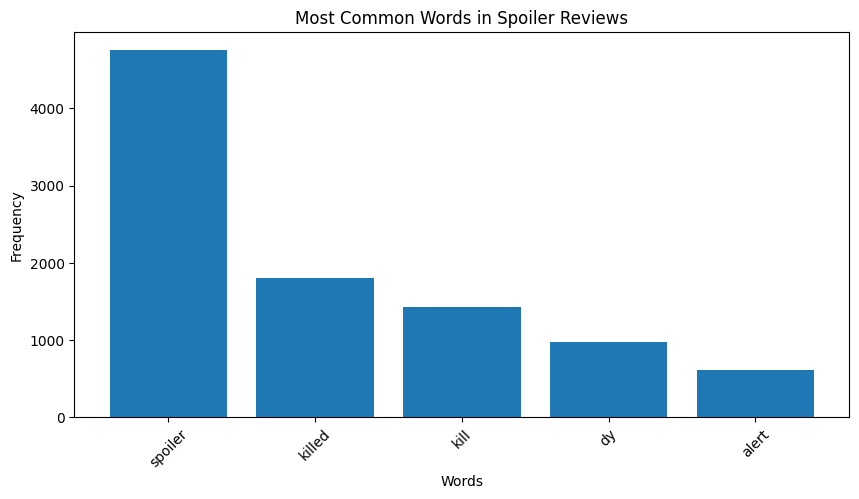

In [20]:
import matplotlib.pyplot as plt
from collections import Counter

spoiler_counts = Counter()
for review in mv_rev[mv_rev["is_spoiler"] == True]["review_text"]:
    spoiler_counts.update(review.split())

clear_counts = Counter()
for review in mv_rev[mv_rev["is_spoiler"] == False]["review_text"]:
    clear_counts.update(review.split())

top_n = 5
common_words = (spoiler_counts - clear_counts).most_common(top_n)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Spoiler Reviews")
plt.xticks(rotation=45)
plt.show()

In [28]:
spoiler_words_set = set([common_word[0] for common_word in common_words])
contains_spoiler = []
for text in mv_rev["review_text"]:
    if len(set(text.split()).intersection(spoiler_words_set)) != 0:
        contains_spoiler.append(1)
    else:
        contains_spoiler.append(0)

mv_rev["has_spoiler_wrd"] = contains_spoiler

In [29]:
mv_rev.value_counts('has_spoiler_wrd')

,count
has_spoiler_wrd,
0,234857
1,31623


In [30]:
word_count = []
for text in mv_rev["review_text"]:
    word_count.append(len(text.split()))

mv_rev["word_count"] = word_count

In [31]:
mv_rev.to_csv('mv_rev.csv', index=False)

In [32]:
mv_det.to_csv('mv_det.csv', index=False)

In [33]:
df = mv_rev.merge(mv_det, on="movie_id", how="inner")
df

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,has_spoiler_wrd,word_count,plot_summary,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2005-09-30,tt0068646,ur5445669,True,concentrating great godfather easier way judge...,10,"""The Godfather"" is pretty much flawless, and o...",0,91,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,0
1,2002-03-05,tt0068646,ur0218695,True,godfather film personally did significant weak...,10,"Another kind of ""family movie""",0,500,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,0
2,2002-12-25,tt0068646,ur1241331,True,far best movie portrait organized crime movie ...,9,Magnificent portrait of organized crime,0,77,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,0
3,2008-06-29,tt0068646,ur14069613,True,godfather simply greatest film time script the...,10,"An Epic, Masterful Look into the Underground W...",0,428,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,0
4,2001-02-24,tt0068646,ur0176092,True,godfather huge piece film entertaining involvi...,10,An exquisite Mafia epic with outstanding perfo...,0,393,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266475,2003-10-14,tt0185937,ur2441749,False,movie scared death spend night forest anymore ...,10,The best horror movie i ever seen.,0,42,Three film students travel to Maryland to make...,...,1,0,0,1,0,0,0,0,0,0
266476,2003-07-27,tt0185937,ur2585236,False,saw movie cinema honestly say wa worst movie s...,1,Worst movie I've ever seen!!,0,38,Three film students travel to Maryland to make...,...,1,0,0,1,0,0,0,0,0,0
266477,2003-06-27,tt0185937,ur2485648,False,ha biggest sucker job applaud maker garbage su...,1,Biggest scam ever,0,23,Three film students travel to Maryland to make...,...,1,0,0,1,0,0,0,0,0,0
266478,2003-06-19,tt0185937,ur0659363,False,wa frightened fabulous trick sheer medium hype...,1,"Great marketing, rubbish film",0,30,Three film students travel to Maryland to make...,...,1,0,0,1,0,0,0,0,0,0


In [34]:
df['time_diff'] = (df['review_date'] - df['release_date']).dt.days
df

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,has_spoiler_wrd,word_count,plot_summary,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,time_diff
0,2005-09-30,tt0068646,ur5445669,True,concentrating great godfather easier way judge...,10,"""The Godfather"" is pretty much flawless, and o...",0,91,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,12243
1,2002-03-05,tt0068646,ur0218695,True,godfather film personally did significant weak...,10,"Another kind of ""family movie""",0,500,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,10938
2,2002-12-25,tt0068646,ur1241331,True,far best movie portrait organized crime movie ...,9,Magnificent portrait of organized crime,0,77,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,11233
3,2008-06-29,tt0068646,ur14069613,True,godfather simply greatest film time script the...,10,"An Epic, Masterful Look into the Underground W...",0,428,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,13246
4,2001-02-24,tt0068646,ur0176092,True,godfather huge piece film entertaining involvi...,10,An exquisite Mafia epic with outstanding perfo...,0,393,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,0,10564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266475,2003-10-14,tt0185937,ur2441749,False,movie scared death spend night forest anymore ...,10,The best horror movie i ever seen.,0,42,Three film students travel to Maryland to make...,...,0,0,1,0,0,0,0,0,0,1537
266476,2003-07-27,tt0185937,ur2585236,False,saw movie cinema honestly say wa worst movie s...,1,Worst movie I've ever seen!!,0,38,Three film students travel to Maryland to make...,...,0,0,1,0,0,0,0,0,0,1458
266477,2003-06-27,tt0185937,ur2485648,False,ha biggest sucker job applaud maker garbage su...,1,Biggest scam ever,0,23,Three film students travel to Maryland to make...,...,0,0,1,0,0,0,0,0,0,1428
266478,2003-06-19,tt0185937,ur0659363,False,wa frightened fabulous trick sheer medium hype...,1,"Great marketing, rubbish film",0,30,Three film students travel to Maryland to make...,...,0,0,1,0,0,0,0,0,0,1420


In [35]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating_x', 'review_summary', 'has_spoiler_wrd', 'word_count',
       'plot_summary', 'duration', 'genre', 'rating_y', 'release_date',
       'plot_synopsis', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'time_diff'],
      dtype='object')

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

unique_synopsis = df.drop_duplicates(subset=["movie_id"])[["movie_id", "plot_synopsis"]].set_index("movie_id")

vectorizer = TfidfVectorizer(stop_words='english')
synopsis_tfidf = vectorizer.fit_transform(unique_synopsis["plot_synopsis"])

synopsis_vectors = dict(zip(unique_synopsis.index, synopsis_tfidf))

review_tfidf = vectorizer.transform(df["review_text"])

similarity_scores = []
for i, row in df.iterrows():
    movie_id = row["movie_id"]
    similarity = cosine_similarity(review_tfidf[i], synopsis_vectors[movie_id])[0][0]
    similarity_scores.append(similarity)

df["similarity_score"] = similarity_scores
df

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,has_spoiler_wrd,word_count,plot_summary,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,time_diff,similarity_score
0,2005-09-30,tt0068646,ur5445669,True,concentrating great godfather easier way judge...,10,"""The Godfather"" is pretty much flawless, and o...",0,91,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,12243,0.045052
1,2002-03-05,tt0068646,ur0218695,True,godfather film personally did significant weak...,10,"Another kind of ""family movie""",0,500,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,10938,0.376030
2,2002-12-25,tt0068646,ur1241331,True,far best movie portrait organized crime movie ...,9,Magnificent portrait of organized crime,0,77,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,11233,0.215944
3,2008-06-29,tt0068646,ur14069613,True,godfather simply greatest film time script the...,10,"An Epic, Masterful Look into the Underground W...",0,428,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,13246,0.381311
4,2001-02-24,tt0068646,ur0176092,True,godfather huge piece film entertaining involvi...,10,An exquisite Mafia epic with outstanding perfo...,0,393,When the aging head of a famous crime family d...,...,0,0,0,0,0,0,0,0,10564,0.311336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266475,2003-10-14,tt0185937,ur2441749,False,movie scared death spend night forest anymore ...,10,The best horror movie i ever seen.,0,42,Three film students travel to Maryland to make...,...,0,1,0,0,0,0,0,0,1537,0.336584
266476,2003-07-27,tt0185937,ur2585236,False,saw movie cinema honestly say wa worst movie s...,1,Worst movie I've ever seen!!,0,38,Three film students travel to Maryland to make...,...,0,1,0,0,0,0,0,0,1458,0.013282
266477,2003-06-27,tt0185937,ur2485648,False,ha biggest sucker job applaud maker garbage su...,1,Biggest scam ever,0,23,Three film students travel to Maryland to make...,...,0,1,0,0,0,0,0,0,1428,0.012933
266478,2003-06-19,tt0185937,ur0659363,False,wa frightened fabulous trick sheer medium hype...,1,"Great marketing, rubbish film",0,30,Three film students travel to Maryland to make...,...,0,1,0,0,0,0,0,0,1420,0.006669


In [38]:
df['is_spoiler'] = df['is_spoiler'].astype(int)
df

In [40]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating_x', 'review_summary', 'has_spoiler_wrd', 'word_count',
       'plot_summary', 'duration', 'genre', 'rating_y', 'release_date',
       'plot_synopsis', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'time_diff', 'similarity_score'],
      dtype='object')

In [41]:
final_df = df.drop(columns=['review_date', 'movie_id', 'user_id', 'review_text', 'review_summary', 'plot_summary', 'genre', 'release_date', 'plot_synopsis'])
final_df

,is_spoiler,rating_x,has_spoiler_wrd,word_count,duration,rating_y,Action,Adventure,Animation,Biography,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,time_diff,similarity_score
0,1,10,0,91,175,9.2,0,0,0,0,...,0,0,0,0,0,0,0,0,12243,0.045052
1,1,10,0,500,175,9.2,0,0,0,0,...,0,0,0,0,0,0,0,0,10938,0.376030
2,1,9,0,77,175,9.2,0,0,0,0,...,0,0,0,0,0,0,0,0,11233,0.215944
3,1,10,0,428,175,9.2,0,0,0,0,...,0,0,0,0,0,0,0,0,13246,0.381311
4,1,10,0,393,175,9.2,0,0,0,0,...,0,0,0,0,0,0,0,0,10564,0.311336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266475,0,10,0,42,81,6.4,0,0,0,0,...,0,1,0,0,0,0,0,0,1537,0.336584
266476,0,1,0,38,81,6.4,0,0,0,0,...,0,1,0,0,0,0,0,0,1458,0.013282
266477,0,1,0,23,81,6.4,0,0,0,0,...,0,1,0,0,0,0,0,0,1428,0.012933
266478,0,1,0,30,81,6.4,0,0,0,0,...,0,1,0,0,0,0,0,0,1420,0.006669


In [42]:
correlation_matrix = final_df.corr()
correlation_matrix

,is_spoiler,rating_x,has_spoiler_wrd,word_count,duration,rating_y,Action,Adventure,Animation,Biography,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,time_diff,similarity_score
is_spoiler,1.000000,-0.090626,0.244822,0.231415,0.002550,-0.007536,0.033595,0.037992,-0.002578,-0.010915,...,-0.008540,0.024134,-0.027375,0.044477,-0.008472,0.021099,-0.013479,-0.002513,0.007878,0.203405
rating_x,-0.090626,1.000000,-0.065328,0.015216,0.053924,0.269640,-0.116418,-0.052013,0.055062,0.069513,...,0.005252,0.004839,0.021746,-0.076863,0.020023,-0.041823,0.036394,0.034099,0.181740,0.115353
has_spoiler_wrd,0.244822,-0.065328,1.000000,0.250093,0.014675,-0.010428,0.064272,0.021124,-0.033819,-0.032012,...,-0.011393,0.025006,-0.059053,0.036754,-0.023994,0.050465,0.010104,0.024972,0.003152,0.172256
word_count,0.231415,0.015216,0.250093,1.000000,0.050455,0.012345,0.053448,0.055452,0.003200,0.024507,...,0.008890,-0.012726,-0.029224,0.036634,-0.000184,0.009335,-0.006388,0.014229,0.016330,0.463775
duration,0.002550,0.053924,0.014675,0.050455,1.000000,0.291139,0.016814,0.124534,-0.218914,0.092752,...,0.034355,-0.085464,-0.002408,-0.029427,-0.031913,-0.052230,0.102455,0.176978,0.098366,-0.006939
rating_y,-0.007536,0.269640,-0.010428,0.012345,0.291139,1.000000,-0.274843,-0.120246,0.047528,0.129790,...,0.003313,0.118041,-0.040260,-0.105341,-0.011622,-0.040739,0.123612,0.089420,0.323382,-0.011749
Action,0.033595,-0.116418,0.064272,0.053448,0.016814,-0.274843,1.000000,0.476141,-0.056732,-0.130386,...,-0.078185,-0.203649,-0.218050,0.240265,-0.078548,-0.069042,-0.060281,-0.030443,-0.181265,0.055494
Adventure,0.037992,-0.052013,0.021124,0.055452,0.124534,-0.120246,0.476141,1.000000,0.146721,-0.156359,...,-0.069657,-0.206369,-0.243225,0.140715,-0.080865,-0.179353,-0.090859,-0.010372,-0.114373,0.071369
Animation,-0.002578,0.055062,-0.033819,0.003200,-0.218914,0.047528,-0.056732,0.146721,1.000000,-0.045263,...,-0.023301,-0.077495,-0.078052,-0.096442,-0.023409,-0.095777,-0.030096,-0.023925,-0.050773,0.073451
Biography,-0.010915,0.069513,-0.032012,0.024507,0.092752,0.129790,-0.130386,-0.156359,-0.045263,1.000000,...,0.013258,-0.077358,-0.074259,-0.096272,0.183030,-0.062315,-0.030043,-0.023883,-0.002996,0.075603


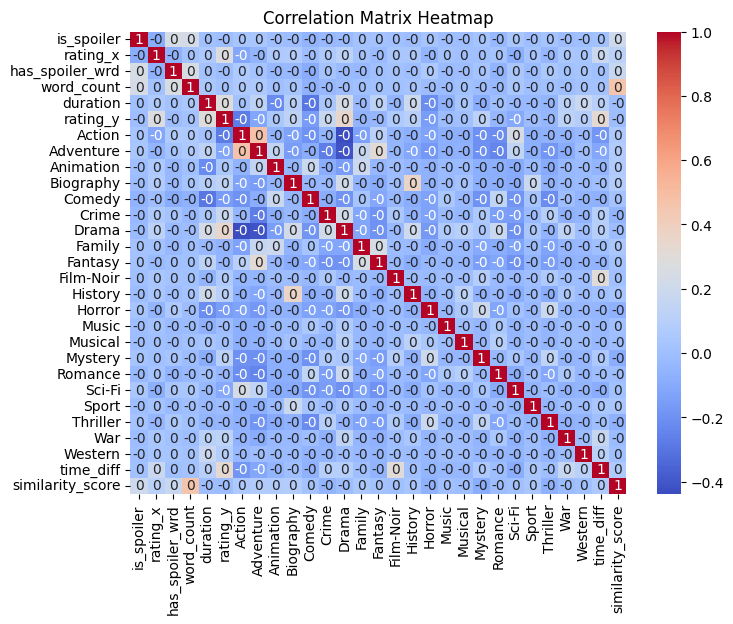

In [43]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.0f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = final_df.drop(columns=['is_spoiler'])
y = final_df['is_spoiler']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f"F1 Accuracy: {accuracy_score(y_test, y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     39356
           1       0.56      0.26      0.36     13940

    accuracy                           0.75     53296
   macro avg       0.67      0.60      0.60     53296
weighted avg       0.72      0.75      0.72     53296



In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

In [86]:
threshold = 0.26
y_pred_adjusted = (y_proba >= threshold).astype(int)
print(f"{classification_report(y_test, y_pred_adjusted)}")

              precision    recall  f1-score   support

           0       0.86      0.66      0.75     39356
           1       0.43      0.71      0.53     13940

    accuracy                           0.67     53296
   macro avg       0.65      0.68      0.64     53296
weighted avg       0.75      0.67      0.69     53296



In [55]:
import joblib

joblib.dump(model, "xgb_model.pkl")

['xgb_model.pkl']

In [57]:
X_train.columns

Index(['rating_x', 'has_spoiler_wrd', 'word_count', 'duration', 'rating_y',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'time_diff', 'similarity_score'],
      dtype='object')

In [58]:
spoiler_words_set

{'alert', 'dy', 'kill', 'killed', 'spoiler'}